In [18]:
import pygrib
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr


In [19]:
#get gfs on 1degree lat/lon grid from NOMADS server in grib2 format
date = '20200812' # YYYYMMDD
modelRun = '00' # HH
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/

#specify forecast hour of file
forecastHour = '000' # HHH

#local path
path='C:/Users/johnh/OneDrive/Desktop/ATMOS_6010/GITHUB/ATMOS6010/data'
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour

#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-08-12 00:00:00 2020-08-12 00:00:00 0
surface 0 Visibility vis 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-08-12 00:00:00 2020-08-12 00:00:00 0
surface 0 Wind speed (gust) gust 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInPa 40 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
iso

isobaricInhPa 400 Vertical velocity w 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Absolute vorticity absv 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Ozone mixing ratio o3mr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 450 Geopotential Height gh 2020-08-12 00:00:00 2020-08-1

isobaricInhPa 975 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 Absolute vorticity absv 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 975 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 1000 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 1000 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 1000 Total Cloud Cover tcc 2020-08-12 00:00:00 2020-08-12 00:00:

heightAboveSea 3658 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
heightAboveSea 3658 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
heightAboveSea 3658 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isothermZero 0 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isothermZero 0 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
pressureFromGroundLayer 3000 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
pressureFromGroundLayer 3000 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
pressureFromGroundLayer 3000 Specific humidity q 2020-08-12 00:00:00 2020-08-12 00:00:00 0
pressureFromGroundLayer 3000 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
pressureFromGroundLayer 3000 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0

In [20]:
# get 500 hPa geopotential height
h = grbs.select(shortName='gh',level=500)
# Extract all the values
h5_all = h[0].values
#what are the dimensions? note lat first, lon second
print(np.shape(h5_all))

# Get the lat/lon grids from the grib2 file
lats_all, lons_all = h[0].latlons()

# get 500 hPa u wind
u = grbs.select(shortName='u',level=500)
# Extract the values
u5_all = u[0].values
# get 500 hPa v wind
v = grbs.select(shortName='v',level=500)
# Extract the values
v5_all = v[0].values

grbs.close()

(181, 360)


In [21]:
#make the data more manageable in this case for a US centric sector
#upper left corner lat/lon
ult = 70
uln = 180
#lower right corner lat/lon
rlt = 15
rln = 340
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays
h5 = h5_all[ulti:rlti,ulni:rlni]
u5 = u5_all[ulti:rlti,ulni:rlni]
v5 = v5_all[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]

In [22]:
#compute coriolis parameter
omega = 7.292*1.E-5
f = 2 * omega * np.sin(np.pi*lats/180.)

In [23]:
#setup projection
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-97.5,
                               central_latitude=38.5,
                               standard_parallels=(30, 60))

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

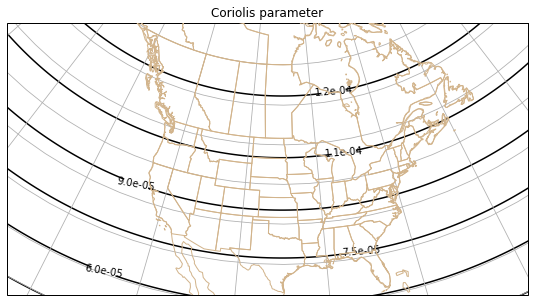

In [24]:
#plot coriolis parameter
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
#focus on NA

# Plot fields
cs=ax.contour(lons,lats,f,transform=datacrs,colors='black')
plt.clabel(cs,fmt='%.1e',inline=True)
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
ax.set_title('Coriolis parameter')
plt.savefig('gfs_f.png')
plt.show()

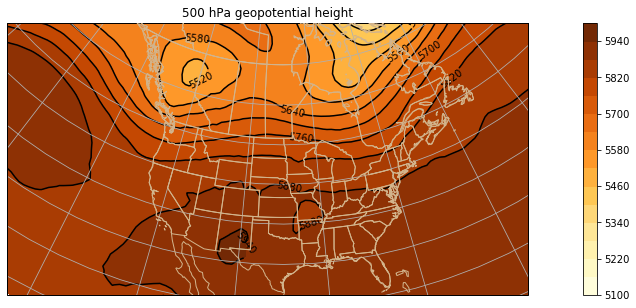

In [25]:
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot height field
# select center contour interval, interval, and number of contours
cnt5 = 5580
int5 = 60
no5 = 8
lh5 = cnt5 - no5 * int5
up5 = cnt5 + no5 * int5
cs=ax.contour(lons,lats,h5,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
cs1 = ax.contourf(lons,lats,h5,levels=range(lh5,up5,int5),cmap=rcol,transform=ccrs.PlateCarree())
cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)

ax.set_title('500 hPa geopotential height')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('gfs_ht.png')
plt.show()

In [26]:
# use metpy functions to do the 'heavy lifting'
#https://unidata.github.io/MetPy/
#find the increments in each direction on the grid
dx, dy = mpcalc.lat_lon_grid_deltas(lons,lats)
print(np.shape(dx),np.shape(dy))
#metpy needs units declared for calculations
h5 = h5 * units.meter
#compute geostrophic wind
ug5,vg5 = mpcalc.geostrophic_wind(h5, f, dx, dy)

(55, 159) (54, 160)


In [27]:
# calculate speed of wind, geostrophic wind, ageostrophic wind
sp5 = mpcalc.wind_speed(u5, v5)
print('min speed %.1f' % np.min(sp5))
print('max speed %.1f' % np.max(sp5))
gsp5 = mpcalc.wind_speed(ug5, vg5)
#in the following the '.m' means use the magnitude of the variable
print('min geo speed %.1f' % np.min(gsp5.m))
print('max geo speed %.1f' % np.max(gsp5.m))
# ageostrophic wind
ua5 = u5 - ug5.m
va5 = v5 - vg5.m
agsp5 = mpcalc.wind_speed(ua5, va5)
print('min ageo speed %.1f' % np.min(agsp5))
print('max ageo speed %.1f' % np.max(agsp5))

min speed 0.0
max speed 36.1
min geo speed 0.0
max geo speed 111.9
min ageo speed 0.0
max ageo speed 90.4


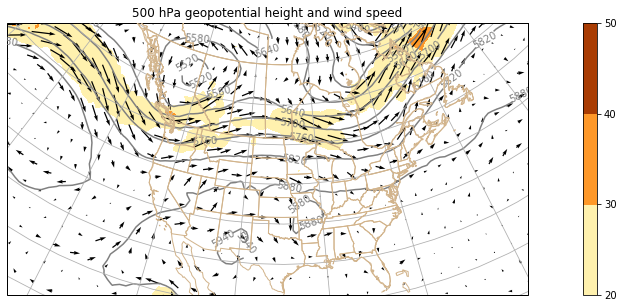

In [28]:
#plot the winds and heights
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# Plot height field
cs=ax.contour(lons,lats,h5,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='grey')
#plot wind speed
cs1 = ax.contourf(lons,lats,sp5,cmap=rcol,levels=range(20,60,10),transform=ccrs.PlateCarree())
cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)

#plot every third wind vector
skip=(slice(None,None,3),slice(None,None,3))
plt.quiver(lons[skip],lats[skip],u5[skip],v5[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
plt.clabel(cs,fmt='%0.f',inline=True)
ax.set_title('500 hPa geopotential height and wind speed')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('gfs_ht_wind.png')
plt.show()

In [29]:
#compute divergence
#smooth winds first to reduce chatter
u5s = mpcalc.smooth_gaussian(u5,5)
v5s = mpcalc.smooth_gaussian(v5,5)
div = mpcalc.divergence(u5s,v5s,dx,dy)
print('min divergence %.1e' % np.min(div.m))
print('max divergence %.1e' % np.max(div.m))
div = div *1.E6
div_r = np.max(div.m)-np.min(div.m)
div_int = int(div_r/8)

min divergence -3.7e-05
max divergence 5.4e-05


positive range(11, 44, 11)
negative range(-44, -11, 11)


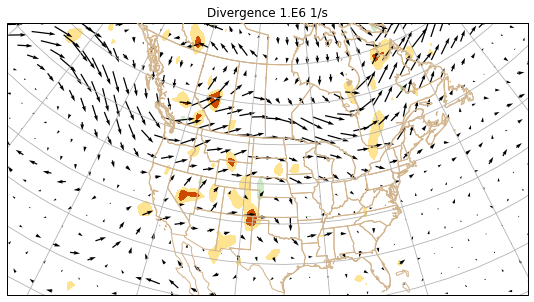

In [30]:
# Plot divergence
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# fill pos divergence
dlev=range(div_int,div_int*4,div_int)
print('positive',dlev)
cs = plt.contourf(lons,lats,div,cmap=rcol,levels=dlev,transform=ccrs.PlateCarree())
# fill neg divergence
dlev=range(-div_int*4,-div_int,div_int)
print('negative',dlev)
cs = plt.contourf(lons,lats,div,cmap=bcol,levels=dlev,transform=ccrs.PlateCarree())
#plt.contour(lons,lats,div,colors='black',linewidths=0.5,transform=ccrs.PlateCarree())
plt.quiver(lons[skip],lats[skip],u5[skip],v5[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
plt.clabel(cs,fmt='%0.1f',inline=True)
#cb=plt.colorbar(cs)
ax.set_title('Divergence 1.E6 1/s')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('ex_div.png')
plt.show()

In [31]:
#compute vorticity using smoothed winds
vor = mpcalc.vorticity(u5s,v5s,dx,dy)
vor = vor *1.E5
vor_r = np.max(vor.m)-np.min(vor.m)
vor_int = int(vor_r/8)
print(vor_int)
print('min vorticity %.1e' % np.min(vor.m))
print('max vorticity %.1e' % np.max(vor.m))

4
min vorticity -8.9e+00
max vorticity 2.5e+01


positive range(4, 16, 4)
negative range(-16, -4, 4)


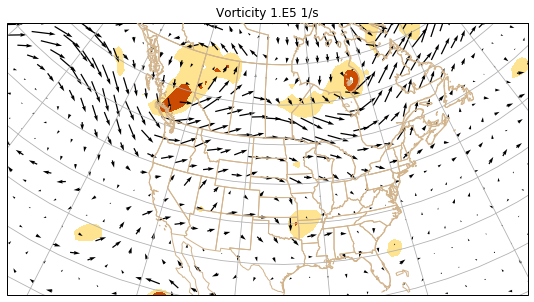

In [32]:
# Plot vorticity
fig,ax = plt.subplots(figsize=(20,5),subplot_kw={'projection': mapcrs})
ax.set_extent([-140,-60,20,60])
# fill pos vorticity
vlev=range(vor_int,vor_int*4,vor_int)
print('positive',vlev)
cs = plt.contourf(lons,lats,vor,cmap=rcol,levels=vlev,transform=ccrs.PlateCarree())
# fill neg vorticity
vlev=range(-vor_int*4,-vor_int,vor_int)
print('negative',vlev)
cs = plt.contourf(lons,lats,vor,cmap=bcol,levels=vlev,transform=ccrs.PlateCarree())
#plt.contour(lons,lats,vor,colors='black',linewidths=0.5,transform=ccrs.PlateCarree())
plt.quiver(lons[skip],lats[skip],u5[skip],v5[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
#cb=plt.colorbar(cs)
ax.set_title('Vorticity 1.E5 1/s')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('ex_vor.png')
plt.show()